In [1]:
import sys
import os
from IPython.core.display import display, HTML

"""
On Windows, sometimes, some cuda libraries does not work very well. One needs to add the cuda path mannually.
The following line is an example.
"""
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli\Anaconda3\envs\python36\Library\bin"

"""
Because I have not realised this package. To use this package, one can not simply install with pip.
Instead, one needs to clone from the repo and append the path to this repo to the system path variable.
"""
sys.path.append('C:/Users/hyli/Documents/GitHub/Phasing/')

"""
This line is totally optional. It only changes the cell width.
"""
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import some other necessary packages
import numpy as np
import matplotlib.pyplot as plt
import PhaseTool   # This is the name of this package

# Create a test object and show the corresponding information

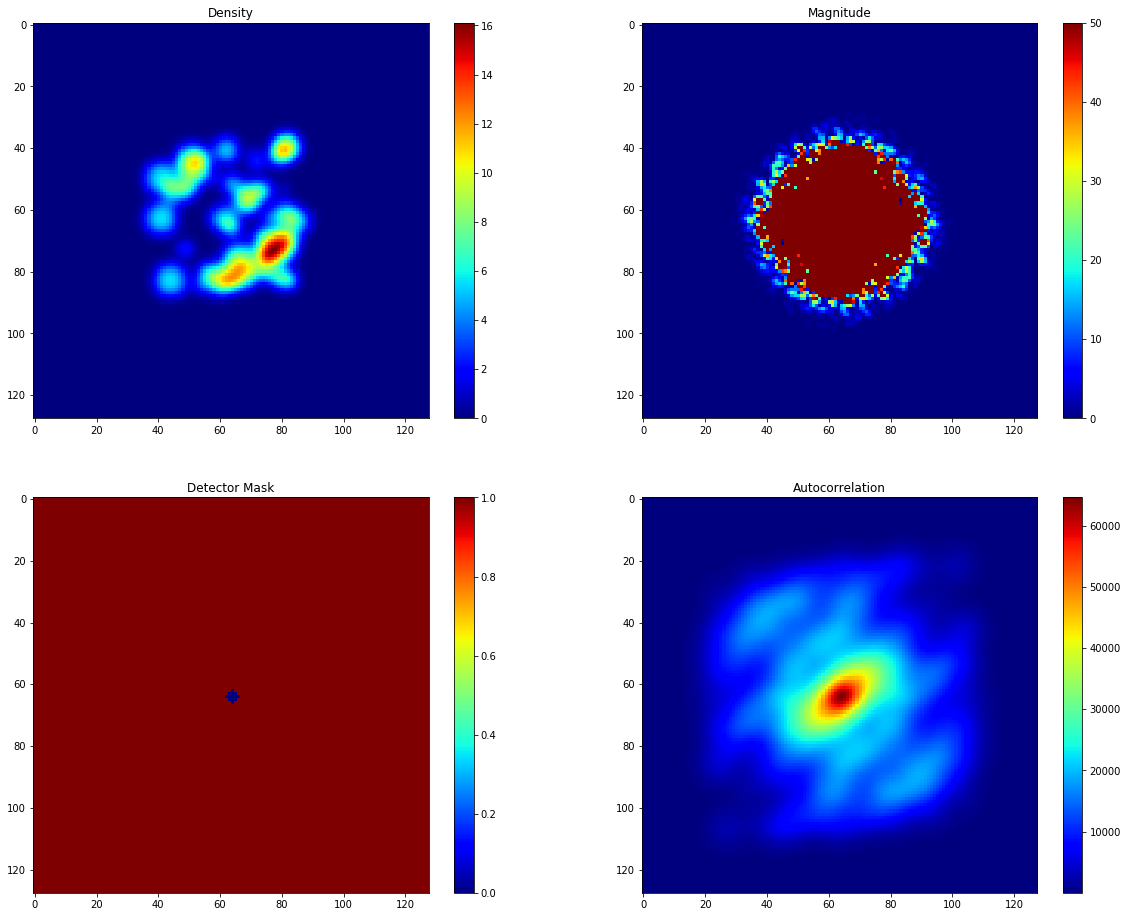

In [2]:
sample = PhaseTool.util.SmoothSample()


############################################################################################################
#  Show sample information
############################################################################################################
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample.density, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Density")

im = axes[0,1].imshow(sample.intensity, vmax=50, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Magnitude")

im = axes[1,0].imshow(sample.detector_mask, cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Detector Mask")

im = axes[1,1].imshow(PhaseTool.util.get_autocorrelation(sample.intensity), vmin=0.4 ,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Autocorrelation")

# Show the canvas
plt.show()  

# AlterProjChain Test: No Beam Stop, No Noise

In [3]:
"""
This aims to test the AlterProjChain object. No beam stop, no noise. The reuslt should be a perfect reconstruction with the default algorithm sequence.
"""
# Create a toolchain object and initialize the data.
toolchain = PhaseTool.ToolChain.AlterProjChain(intensity=sample.intensity,
                                               detector_mask=np.ones_like(sample.intensity, dtype=np.bool),
                                               keep_full_history=True)

# Specify the defualt toolchains to use
toolchain.use_default_algorithm_sequence(idx=1)

# Show the information of this algorithm sequence
toolchain.show_introduction_and_algorithm_sequence(show_detail=False)

# Execute this tool chain.
toolchain.execute_algorithm_sequence()

----------------------------Part 0: Introduction-----------------------------------
When doing phase retrieval, it seems a little bit difficult to do it with a single algorithm. Therefore I created this AlterProjChain object to organize a sequence of different projection methods. Therefore, this object is not fundamental. You can definitely combine CpuAlterProj objects to finished whatever you can do with this object and more.

In this object, the calculation sequence is controlled with a list called algorithm_sequence. Each element in this list is a dictionary. Each dictionary contains complete information for one group of alternating projection algorithm.

----------------------------Part 1: Current Sequence Summary-----------------------
At present there are totally 3 elements in the algorithm sequence.
They are respectively:

For algorithm No.0
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink Wrap:False


For algorithm No.1
Algorithm Name:RAAR
Iteration Number:1200
Use Shrink W

C:\Users\hyli\Anaconda3\envs\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hyli\Anaconda3\envs\python36\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


***------------------------------------------------------------------------***


***------------------------------------------------------------------------***
Begin the No.1 algorithm in this sequence.
Enable shrink wrap functions.
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 5.0
The decay_rate argument is set to be 30
Therefore, the shrink wrap algorithm will be applied every 30iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay

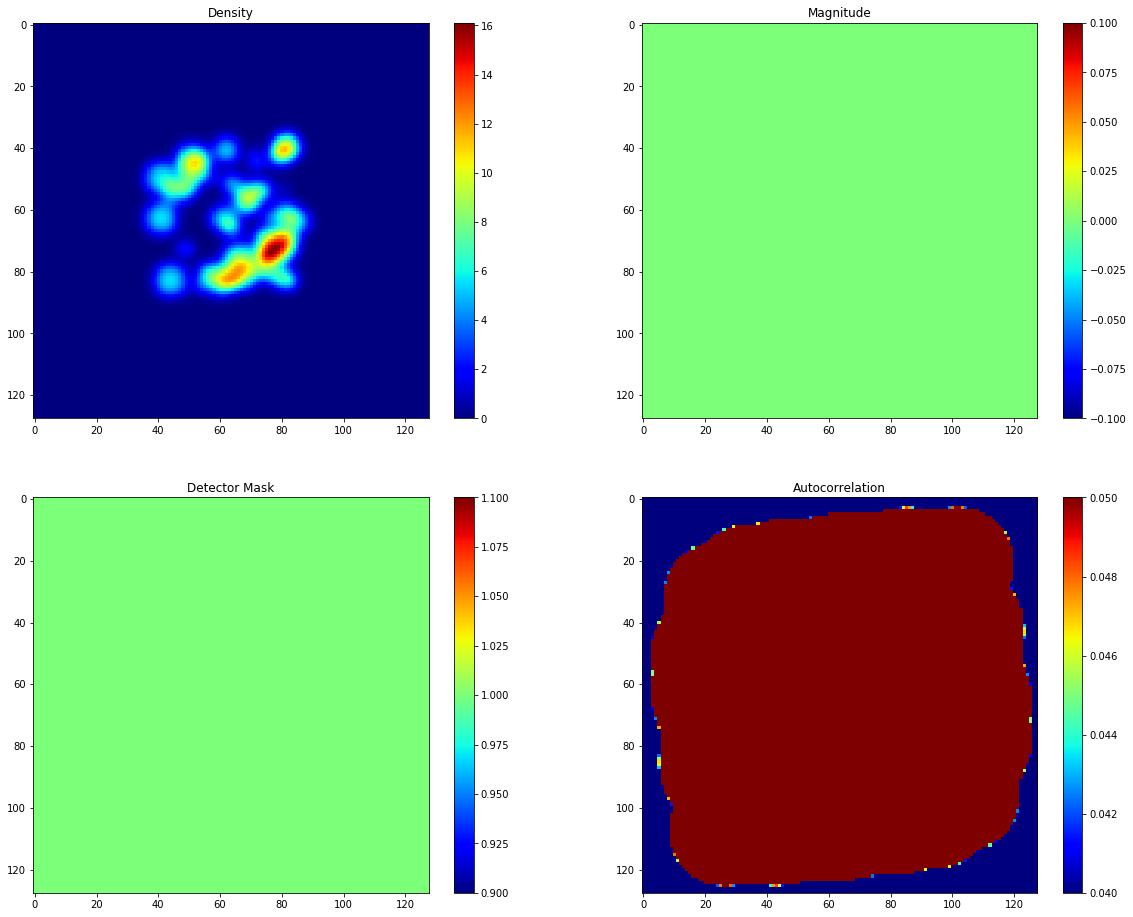

In [4]:
############################################################################################################
#  Show Result
############################################################################################################

# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample.density, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Density")

im = axes[0,1].imshow(toolchain.alter_proj_obj.density, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Magnitude")

im = axes[1,0].imshow(toolchain.alter_proj_obj.support, cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Detector Mask")

im = axes[1,1].imshow(PhaseTool.util.get_autocorrelation(sample.intensity), vmin=0.04, vmax=0.05 ,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Autocorrelation")

# Show the canvas
plt.show()  

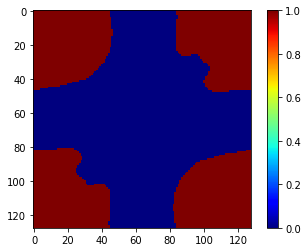

In [7]:
plt.imshow(toolchain.alter_proj_obj.support, cmap='jet')
plt.colorbar()
plt.show()

In [6]:
toolchain._create_algorithm_object(toolchain.algorithm_sequence[0])

The center of the diffraction is :
[ 64.  64.]
Initialize with auto-correlation information.
Disable shrink wrap functions.
The user uses a constant value for the beta value. This valuesbeta = 0.87
This values is recognized as the initial beta value for a list of decaying beta values. The length of this list is the iter_num valuewhich is 1200


In [20]:
# Step 2: Initialize the object with the data
alter_proj_2 = copy.deepcopy(alter_proj)

alter_proj_2.shrink_warp_properties(on=True,
                                    threshold_ratio=0.04,
                                    sigma=5.,
                                    decay_rate=30,
                                    threshold_ratio_decay_ratio=1.0,
                                    sigma_decay_ratio=0.95,
                                    filling_holes=True,
                                    convex_hull=False)

Enable shrink wrap functions.
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 5.0
The decay_rate argument is set to be 30
Therefore, the shrink wrap algorithm will be applied every 30iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 0.95 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
Filling holes in the support de

In [21]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_2.execute_algorithm()

The self.iter_counter is set to 0.
Using algorithm RAAR
Finishes self-consistency check.
iteration number: 0
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 100
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 200
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 300
As per request, fill hole

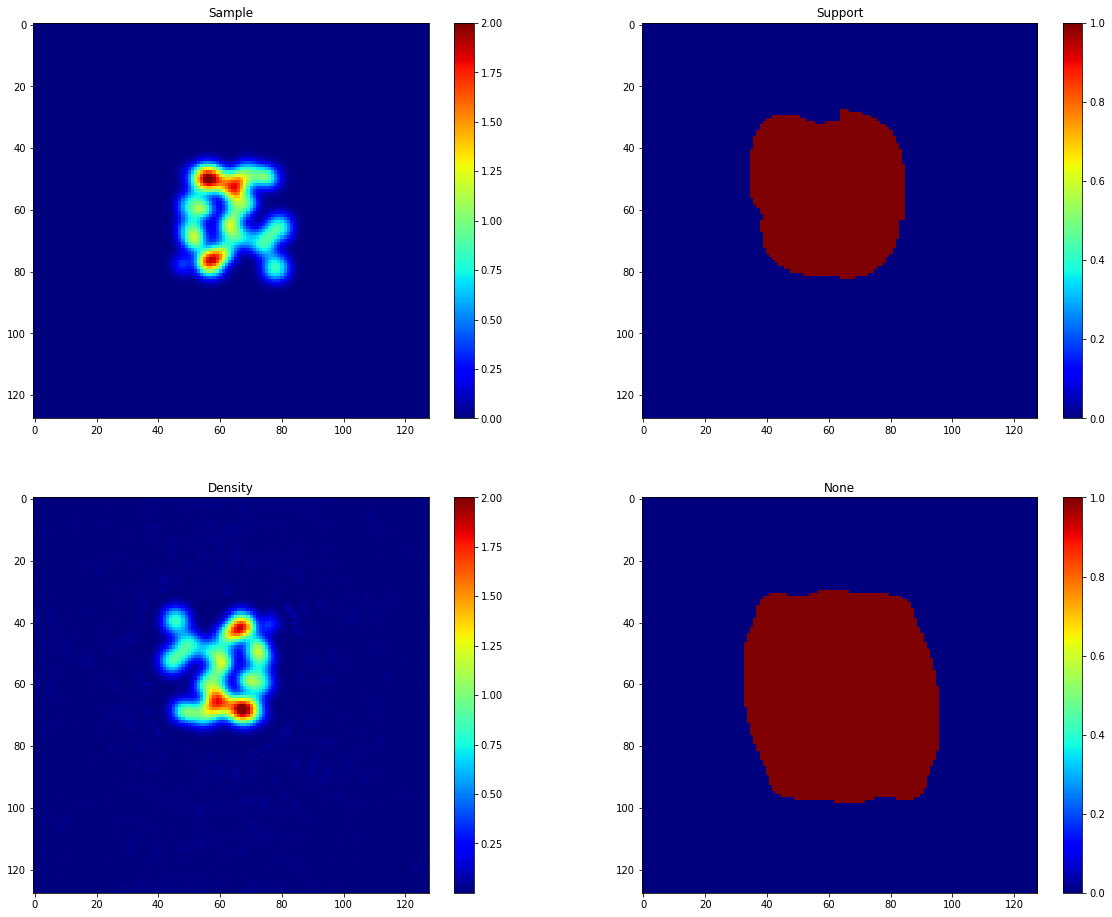

In [22]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.fft.ifftshift(alter_proj_2.data_dict['support']), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.abs(np.fft.ifftshift(alter_proj_2.data_dict['density'])), vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']),cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [23]:
# Step 2: Initialize the object with the data
alter_proj_3 = copy.deepcopy(alter_proj_2)

alter_proj_3.set_algorithm(alg_name="ER")
alter_proj_3.set_beta_and_iter_num(iter_num=2000)

alter_proj_3.shrink_warp_properties(on=False,
                                    threshold_ratio=0.04,
                                    sigma=5.,
                                    decay_rate=30,
                                    threshold_ratio_decay_ratio=1.0,
                                    sigma_decay_ratio=0.95,
                                    filling_holes=True,
                                    convex_hull=False)

The user uses a constant value for the beta argument. The argument decay is set to False. The iteration number is 2000
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 5.0
The decay_rate argument is set to be 30
Therefore, the shrink wrap algorithm will be applied every 30iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set thr

In [24]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_3.execute_algorithm()

The self.iter_counter is set to 0.
Using algorithm ER
Finishes self-consistency check.


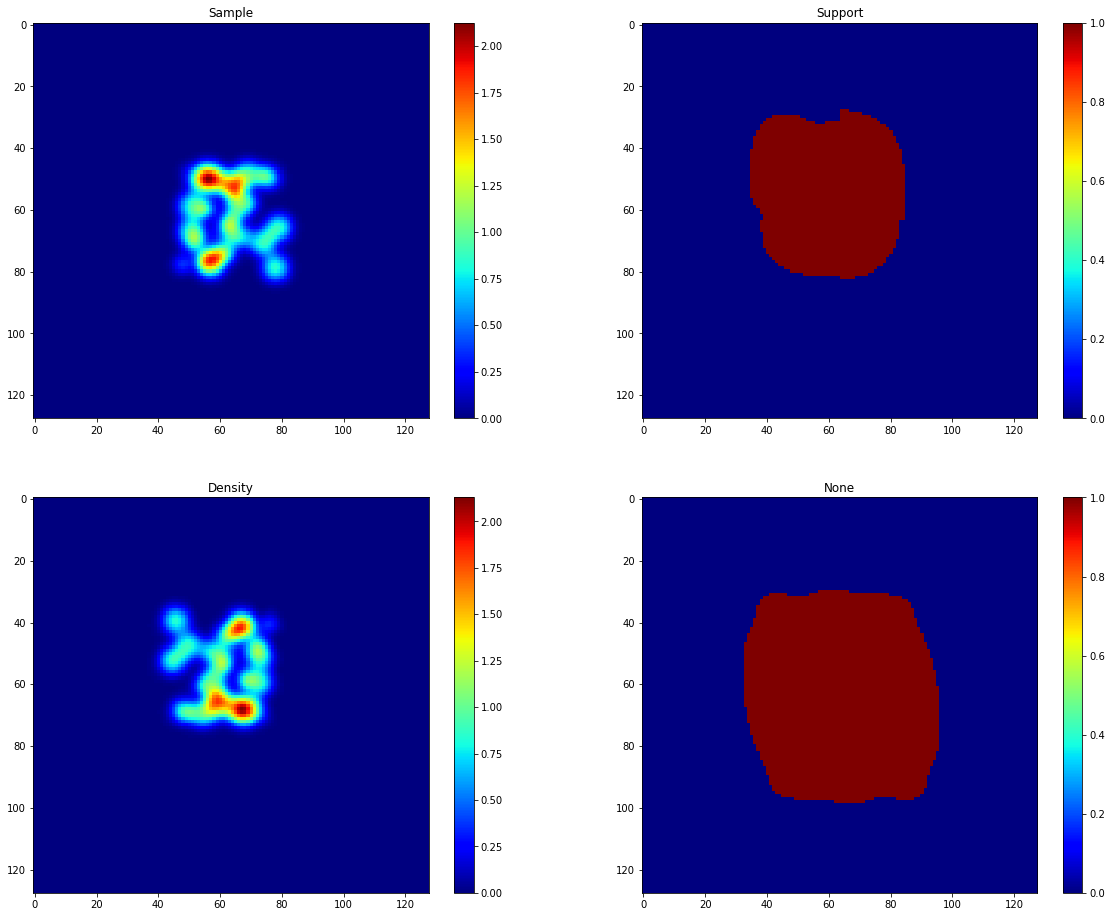

In [25]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.fft.ifftshift(alter_proj_2.data_dict['support']), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.fft.ifftshift(alter_proj_3.data_dict['density']), cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']),cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [26]:
recover = np.copy(np.fft.ifftshift(alter_proj_3.data_dict['density']))

recover = np.fliplr(np.flipud(recover))

In [27]:
center_r = ndimage.center_of_mass(recover)
center_s = ndimage.center_of_mass(sample)

In [28]:
shift_r = ndimage.shift(recover, shift=[63 - center_r[0], 63 - center_r[1]])
shift_s = ndimage.shift(sample, shift=[63 - center_s[0], 63 - center_s[1]])

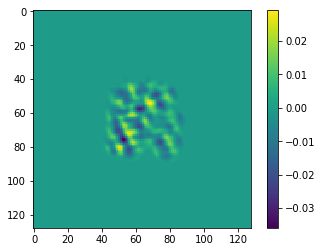

In [29]:
plt.imshow(shift_s - shift_r)
plt.colorbar()
plt.show()

In [30]:
np.sum(np.abs(shift_s - shift_r)) / np.sum(np.abs(shift_s))

0.01506878891762246

In [1]:
import numpy as np

In [2]:
type(np.power(2, 5))

numpy.int32